In [406]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

In [84]:
# basics dataframe will be used as a guide linking the others since it is the only
# one that has genres and lenght of movies
basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
# first 2 rows
basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [85]:
# last 2 rows
basics.tail(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [86]:
# general shape of the dataset
basics.shape

(146144, 6)

In [87]:
# general info of the dataset
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [88]:
# checking genres column
basics.genres.unique()

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', ...,
       'Music,Musical,Reality-TV', 'Animation,Crime',
       'Adventure,History,War'], dtype=object)

In [89]:
# checking count of genres
basics['genres'].value_counts()

Documentary                      32185
Drama                            21486
Comedy                            9177
Horror                            4372
Comedy,Drama                      3519
                                 ...  
Documentary,News,Reality-TV          1
Animation,Family,Mystery             1
Comedy,Musical,Sport                 1
Animation,Documentary,Mystery        1
Horror,Music,Mystery                 1
Name: genres, Length: 1085, dtype: int64

In [90]:
# checking 10 most common genres
basics['genres'].value_counts()[:10]

Documentary              32185
Drama                    21486
Comedy                    9177
Horror                    4372
Comedy,Drama              3519
Thriller                  3046
Action                    2219
Biography,Documentary     2115
Drama,Romance             2079
Comedy,Drama,Romance      1558
Name: genres, dtype: int64

In [91]:
# ratings dataframe will give us an insight into public opinion
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
# first 2 rows
ratings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [92]:
# last 5 rows
ratings.tail(5)

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [93]:
# checking a random sample of the dataset
ratings.sample(10)

,tconst,averagerating,numvotes
32496,tt2170387,8.2,14
44025,tt6842288,9.1,8
68767,tt6219314,6.2,1083
22503,tt4691166,7.5,99
11283,tt2994788,6.4,135
27677,tt9066502,6.7,79
40640,tt1473181,7.8,6
34734,tt6448950,4.9,28
28334,tt4341532,5.1,1320
50220,tt3484266,6.3,578


In [94]:
# checking columns
ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [95]:
# general dataset info
# Note: rows without empty values
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [96]:
# statistical overview of ratings dataset
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [97]:
# sorting the dataset by 'averagerating'
ratings.sort_values('averagerating', ascending = False)

,tconst,averagerating,numvotes
27644,tt8730716,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
65033,tt9715646,10.0,20
57679,tt5344358,10.0,6
...,...,...,...
50971,tt6017238,1.0,21
32440,tt2087999,1.0,7
36456,tt1896768,1.0,21
54856,tt1976600,1.0,436


In [98]:
# general overview of 'averagerating'
ratings['averagerating'].unique()

array([ 8.3,  8.9,  6.4,  4.2,  6.5,  6.2,  7. ,  7.2,  5.1,  5.8,  8. ,
        5.5,  7.6,  5. ,  7.4,  6.6,  5.4,  4. ,  4.4,  5.6,  6.1,  3.4,
        7.7,  4.5,  6.3,  6.7,  8.4,  7.8,  5.2,  3.6,  2.1,  2.5,  4.6,
        7.5,  5.7,  3.5,  7.1,  8.5,  5.3,  8.2,  3.8,  4.9,  6.9,  8.6,
        7.3,  4.7,  3.2,  2.6,  3.9,  5.9,  8.7,  6.8,  7.9,  2. ,  6. ,
        3.7,  2.4,  3. ,  8.1,  4.8,  2.8,  9.2,  4.3,  2.9,  4.1,  1.4,
        1.9,  8.8,  9.4,  3.3,  9.1,  9.7,  9. ,  2.7,  1. ,  3.1,  1.7,
        2.3,  9.5,  9.3,  2.2,  1.2,  1.1,  9.8,  1.8,  1.5,  9.6,  1.6,
        9.9,  1.3, 10. ])

In [444]:
# roi dataframe will be important to give us an insight on movies with successfull returns of investment
roidf = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
roidf

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [188]:
# Converting 'production_budget' and 'worldwide_gross' columns to numeric values
roidf['production_budget'] = roidf['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
roidf['worldwide_gross'] = roidf['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [189]:
# dropping column 'domestic_gross'
roidf = roidf.drop(columns = 'domestic_gross')
roidf

,id,release_date,movie,production_budget,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09
...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.000000e+00


In [191]:
# for this analysis, we don't need the full release date
# we want to convert the release date to year only format
# converting 'release_date' column to datetime format
roidf['release_date'] = pd.to_datetime(roidf['release_date'])

# extracting the year from 'release_date' column
roidf['release_date'] = roidf['release_date'].dt.year

roidf

,id,release_date,movie,production_budget,worldwide_gross
0,1,2009,Avatar,425000000.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09
...,...,...,...,...,...
5777,78,2018,Red 11,7000.0,0.000000e+00
5778,79,1999,Following,6000.0,2.404950e+05
5779,80,2005,Return to the Land of Wonders,5000.0,1.338000e+03
5780,81,2015,A Plague So Pleasant,1400.0,0.000000e+00


In [205]:
roidf.rename(columns={'movie': 'primary_title'}, inplace=True)


In [206]:
roidf

,id,release_date,primary_title,production_budget,worldwide_gross
0,1,2009,Avatar,425000000.0,2.776345e+09
1,2,2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09
2,3,2019,Dark Phoenix,350000000.0,1.497624e+08
3,4,2015,Avengers: Age of Ultron,330600000.0,1.403014e+09
4,5,2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09
...,...,...,...,...,...
5777,78,2018,Red 11,7000.0,0.000000e+00
5778,79,1999,Following,6000.0,2.404950e+05
5779,80,2005,Return to the Land of Wonders,5000.0,1.338000e+03
5780,81,2015,A Plague So Pleasant,1400.0,0.000000e+00


In [207]:
# general statistics distribution
roidf.describe()

,id,release_date,production_budget,worldwide_gross
count,5782.000000,5782.000000,5.782000e+03,5.782000e+03
mean,50.372363,2003.967139,3.158776e+07,9.148746e+07
std,28.821076,12.724386,4.181208e+07,1.747200e+08
min,1.000000,1915.000000,1.100000e+03,0.000000e+00
25%,25.000000,2000.000000,5.000000e+06,4.125415e+06
50%,50.000000,2007.000000,1.700000e+07,2.798445e+07
75%,75.000000,2012.000000,4.000000e+07,9.764584e+07
max,100.000000,2020.000000,4.250000e+08,2.776345e+09


In [208]:
# merging basics and ratings datasets
merge_1 = pd.merge(ratings, basics, on = 'tconst')

In [209]:
# checking first rows
merge_1.head(10)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
5,tt1069246,6.2,326,Habana Eva,Habana Eva,2010,106.0,"Comedy,Romance"
6,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport"
7,tt1130982,6.4,571,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller"
8,tt1156528,7.2,265,Silent Sonata,Circus Fantasticus,2011,77.0,"Drama,War"
9,tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi"


In [210]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [211]:
# merging roidf dataset to merge1 
roi_merge = pd.merge(merge_1, roidf, on = 'primary_title', how = 'outer')

In [212]:
roi_merge.head(10)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,Borderless,2019.0,87.0,Documentary,NaN,NaN,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,Bedone marz,2014.0,102.0,"Drama,War",NaN,NaN,NaN,NaN
3,tt1042974,6.4,20.0,Just Inès,Just Inès,2010.0,90.0,Drama,NaN,NaN,NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",42.0,2014.0,70000000.0,58953319.0
5,tt1060240,6.5,21.0,Até Onde?,Até Onde?,2011.0,73.0,"Mystery,Thriller",NaN,NaN,NaN,NaN
6,tt1069246,6.2,326.0,Habana Eva,Habana Eva,2010.0,106.0,"Comedy,Romance",NaN,NaN,NaN,NaN
7,tt1094666,7.0,1613.0,The Hammer,Hamill,2010.0,108.0,"Biography,Drama,Sport",50.0,2008.0,850000.0,442638.0
8,tt3096900,6.5,13.0,The Hammer,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",50.0,2008.0,850000.0,442638.0
9,tt1130982,6.4,571.0,The Night Clerk,Avant l'aube,2011.0,104.0,"Drama,Thriller",NaN,NaN,NaN,NaN


In [213]:
roi_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77577 entries, 0 to 77576
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             73979 non-null  object 
 1   averagerating      73979 non-null  float64
 2   numvotes           73979 non-null  float64
 3   primary_title      77577 non-null  object 
 4   original_title     73979 non-null  object 
 5   start_year         73979 non-null  float64
 6   runtime_minutes    66348 non-null  float64
 7   genres             73174 non-null  object 
 8   id                 6473 non-null   float64
 9   release_date       6473 non-null   float64
 10  production_budget  6473 non-null   float64
 11  worldwide_gross    6473 non-null   float64
dtypes: float64(8), object(4)
memory usage: 7.7+ MB


In [214]:
columns_to_drop = ['original_title', 'id', 'release_date']
roi_short = roi_merge.drop(columns=columns_to_drop)
roi_short.head()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN
3,tt1042974,6.4,20.0,Just Inès,2010.0,90.0,Drama,NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0


In [215]:
roi_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77577 entries, 0 to 77576
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             73979 non-null  object 
 1   averagerating      73979 non-null  float64
 2   numvotes           73979 non-null  float64
 3   primary_title      77577 non-null  object 
 4   start_year         73979 non-null  float64
 5   runtime_minutes    66348 non-null  float64
 6   genres             73174 non-null  object 
 7   production_budget  6473 non-null   float64
 8   worldwide_gross    6473 non-null   float64
dtypes: float64(6), object(3)
memory usage: 5.9+ MB


In [216]:
# creating a variable to find current year
current_year = pd.Timestamp.now().year
current_year

2024

In [219]:
# using above variable to limit dataframe to last 10 years
merge_final = roi_short[roi_short['start_year'] >= current_year - 10]
merge_final

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0
...,...,...,...,...,...,...,...,...,...
73974,tt9768966,8.6,27.0,Plugged in,2019.0,53.0,Documentary,NaN,NaN
73975,tt9783738,7.4,7.0,Bangkok Dark Tales,2019.0,NaN,Horror,NaN,NaN
73976,tt9805820,8.1,25.0,Caisa,2018.0,84.0,Documentary,NaN,NaN
73977,tt9844256,7.5,24.0,Code Geass: Lelouch of the Rebellion - Glorifi...,2018.0,120.0,"Action,Animation,Sci-Fi",NaN,NaN


In [218]:
# finding NaN values in common
merge_final.isna().sum()

tconst                   0
averagerating            0
numvotes                 0
primary_title            0
start_year               0
runtime_minutes       4698
genres                 436
production_budget    42498
worldwide_gross      42498
dtype: int64

In [220]:
# eliminating NaN values 
merge_final.dropna(subset=['genres'])

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,NaN,NaN
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,NaN,NaN
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",NaN,NaN
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0
...,...,...,...,...,...,...,...,...,...
73974,tt9768966,8.6,27.0,Plugged in,2019.0,53.0,Documentary,NaN,NaN
73975,tt9783738,7.4,7.0,Bangkok Dark Tales,2019.0,NaN,Horror,NaN,NaN
73976,tt9805820,8.1,25.0,Caisa,2018.0,84.0,Documentary,NaN,NaN
73977,tt9844256,7.5,24.0,Code Geass: Lelouch of the Rebellion - Glorifi...,2018.0,120.0,"Action,Animation,Sci-Fi",NaN,NaN


In [238]:
# checking for duplicates in 'primary_title'
duplicates = merge_final[merge_final.duplicated(subset = ['primary_title'])]
duplicates

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",18000000.0,31009205.5,13009205.5
53,tt2442620,6.8,93.0,Paradox,2016.0,103.0,"Drama,Romance,Sci-Fi",18000000.0,31009205.5,13009205.5
54,tt4540434,4.6,2989.0,Paradox,2016.0,90.0,"Action,Drama,Sci-Fi",18000000.0,31009205.5,13009205.5
55,tt7245176,6.6,2471.0,Paradox,2017.0,101.0,Action,18000000.0,31009205.5,13009205.5
141,tt4581576,5.7,17992.0,Aftermath,2017.0,94.0,"Drama,Thriller",18000000.0,31009205.5,13009205.5
...,...,...,...,...,...,...,...,...,...,...
69432,tt1289401,5.2,186788.0,Ghostbusters,2016.0,116.0,"Action,Comedy,Fantasy",30000000.0,295212467.0,265212467.0
70025,tt5318534,5.6,1137.0,People You May Know,2017.0,92.0,"Comedy,Drama,Romance",18000000.0,31009205.5,13009205.5
70363,tt5537018,5.7,6.0,Coma,2015.0,97.0,Documentary,18000000.0,31009205.5,13009205.5
71395,tt2094769,8.0,10.0,Battle,2015.0,65.0,Action,18000000.0,31009205.5,13009205.5


In [239]:
# dropping duplicates to reduce redudancy
merge_final.drop_duplicates(subset='primary_title', keep = "first")

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,18000000.0,31009205.5,13009205.5
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,18000000.0,31009205.5,13009205.5
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0,-11046681.0
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0,-407362.0
11,tt1161457,4.2,148.0,Vanquisher,2016.0,90.0,"Action,Adventure,Sci-Fi",18000000.0,31009205.5,13009205.5
...,...,...,...,...,...,...,...,...,...,...
73974,tt9768966,8.6,27.0,Plugged in,2019.0,53.0,Documentary,18000000.0,31009205.5,13009205.5
73975,tt9783738,7.4,7.0,Bangkok Dark Tales,2019.0,92.0,Horror,18000000.0,31009205.5,13009205.5
73976,tt9805820,8.1,25.0,Caisa,2018.0,84.0,Documentary,18000000.0,31009205.5,13009205.5
73977,tt9844256,7.5,24.0,Code Geass: Lelouch of the Rebellion - Glorifi...,2018.0,120.0,"Action,Animation,Sci-Fi",18000000.0,31009205.5,13009205.5


In [240]:
# filling NaN values in 'runtime_minutes', 'production_budget' and 'worldwide_gross'
# using median
median_runtime = merge_final['runtime_minutes'].median()
median_runtime

92.0

In [241]:
# using median variable created to fill NaN values
merge_final['runtime_minutes'].fillna(median_runtime, inplace = True)

In [242]:
median_budget = merge_final['production_budget'].median()
median_budget

18000000.0

In [243]:
# using median variable created to fill NaN values
merge_final['production_budget'].fillna(median_budget, inplace = True)

In [244]:
median_gross = merge_final['worldwide_gross'].median()
median_gross

31009205.5

In [245]:
# using median variables created to fill NaN values
merge_final['worldwide_gross'].fillna(median_gross, inplace = True)

In [246]:
merge_final.head()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,18000000.0,31009205.5,13009205.5
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,18000000.0,31009205.5,13009205.5
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",18000000.0,31009205.5,13009205.5
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0,-11046681.0
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0,-407362.0


In [247]:
# checking data after filling NaN values
merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44082 entries, 0 to 73978
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tconst             44082 non-null  object 
 1   averagerating      44082 non-null  float64
 2   numvotes           44082 non-null  float64
 3   primary_title      44082 non-null  object 
 4   start_year         44082 non-null  float64
 5   runtime_minutes    44082 non-null  float64
 6   genres             43646 non-null  object 
 7   production_budget  44082 non-null  float64
 8   worldwide_gross    44082 non-null  float64
 9   world_wide_profit  44082 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.7+ MB


In [248]:
merge_final.head()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,18000000.0,31009205.5,13009205.5
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,18000000.0,31009205.5,13009205.5
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",18000000.0,31009205.5,13009205.5
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0,-11046681.0
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0,-407362.0


In [249]:
merge_final.tail()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit
73974,tt9768966,8.6,27.0,Plugged in,2019.0,53.0,Documentary,18000000.0,31009205.5,13009205.5
73975,tt9783738,7.4,7.0,Bangkok Dark Tales,2019.0,92.0,Horror,18000000.0,31009205.5,13009205.5
73976,tt9805820,8.1,25.0,Caisa,2018.0,84.0,Documentary,18000000.0,31009205.5,13009205.5
73977,tt9844256,7.5,24.0,Code Geass: Lelouch of the Rebellion - Glorifi...,2018.0,120.0,"Action,Animation,Sci-Fi",18000000.0,31009205.5,13009205.5
73978,tt9894098,6.3,128.0,Sathru,2019.0,129.0,Thriller,18000000.0,31009205.5,13009205.5


In [250]:
# creating a worldwide profit column
merge_final['world_wide_profit'] = (merge_final['worldwide_gross'] - merge_final['production_budget'])
merge_final.head()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,18000000.0,31009205.5,13009205.5
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,18000000.0,31009205.5,13009205.5
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",18000000.0,31009205.5,13009205.5
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0,-11046681.0
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0,-407362.0


In [251]:
# creating a ROI column to analise return of investment
merge_final['ROI'] = (merge_final['world_wide_profit']  / merge_final['production_budget']) * 100
merge_final.head()

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit,ROI
0,tt10356526,8.3,31.0,Laiye Je Yaarian,2019.0,117.0,Romance,18000000.0,31009205.5,13009205.5,72.273364
1,tt10384606,8.9,559.0,Borderless,2019.0,87.0,Documentary,18000000.0,31009205.5,13009205.5,72.273364
2,tt4131210,7.1,210.0,Borderless,2014.0,102.0,"Drama,War",18000000.0,31009205.5,13009205.5,72.273364
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0,-11046681.0,-15.780973
8,tt3096900,6.5,13.0,The Hammer,2015.0,75.0,"Action,Adventure,Documentary",850000.0,442638.0,-407362.0,-47.924941


In [259]:
merge_final.describe()

,averagerating,numvotes,start_year,runtime_minutes,production_budget,worldwide_gross,world_wide_profit,ROI
count,44082.000000,4.408200e+04,44082.000000,44082.000000,4.408200e+04,4.408200e+04,4.408200e+04,44082.000000
mean,6.365684,3.002605e+03,2016.114786,94.397260,1.858624e+07,3.368271e+07,1.509648e+07,81.855020
std,1.495631,2.558932e+04,1.506421,23.992672,9.475421e+06,4.111795e+07,3.408407e+07,322.138794
min,1.000000,5.000000e+00,2014.000000,3.000000,7.000000e+03,0.000000e+00,-2.002376e+08,-100.000000
25%,5.500000,1.400000e+01,2015.000000,84.000000,1.800000e+07,3.100921e+07,1.300921e+07,72.273364
50%,6.500000,5.000000e+01,2016.000000,92.000000,1.800000e+07,3.100921e+07,1.300921e+07,72.273364
75%,7.400000,2.770000e+02,2017.000000,103.000000,1.800000e+07,3.100921e+07,1.300921e+07,72.273364
max,10.000000,1.299334e+06,2019.000000,1100.000000,3.500000e+08,2.048134e+09,1.748134e+09,41556.474000


In [435]:
# sorting first popular movies by rating and checking data
# filtering only movies with rating above 8
# when number of votes is over 50000
critically_aclaimed = merge_final[(merge_final['averagerating'] > 8) &(merge_final['numvotes'] > 50000)].sort_values(by='averagerating', ascending=False)
critically_aclaimed

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit,ROI
10770,tt5813916,9.3,100568.0,The Mountain II,2016.0,135.0,"Action,Drama,War",18000000.0,3.100921e+07,1.300921e+07,72.273364
61003,tt4154796,8.8,441135.0,Avengers: Endgame,2019.0,181.0,"Action,Adventure,Sci-Fi",18000000.0,3.100921e+07,1.300921e+07,72.273364
26995,tt0816692,8.6,1299334.0,Interstellar,2014.0,169.0,"Adventure,Drama,Sci-Fi",165000000.0,6.663794e+08,5.013794e+08,303.866288
72174,tt4154756,8.5,670926.0,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi",300000000.0,2.048134e+09,1.748134e+09,582.711400
34980,tt2582802,8.5,616916.0,Whiplash,2014.0,106.0,"Drama,Music",3300000.0,3.896904e+07,3.566904e+07,1080.879909
48910,tt5074352,8.5,123638.0,Dangal,2016.0,161.0,"Action,Biography,Drama",9500000.0,2.946546e+08,2.851546e+08,3001.627558
35654,tt4633694,8.5,210869.0,Spider-Man: Into the Spider-Verse,2018.0,117.0,"Action,Adventure,Animation",18000000.0,3.100921e+07,1.300921e+07,72.273364
52525,tt5311514,8.4,134084.0,Your Name.,2016.0,106.0,"Animation,Drama,Fantasy",18000000.0,3.100921e+07,1.300921e+07,72.273364
37426,tt2380307,8.4,277194.0,Coco,2017.0,105.0,"Adventure,Animation,Comedy",175000000.0,7.980081e+08,6.230081e+08,356.004629
8028,tt6966692,8.3,204972.0,Green Book,2018.0,130.0,"Biography,Comedy,Drama",23000000.0,3.220344e+08,2.990344e+08,1300.149735


In [269]:
# checking individual counts of each genre
# Drama is the most successfull genre but is always paired with another
# Action and Adventure are close 
# any mix of this 3 genres will give Microsoft a change at success
genre_counts = critically_aclaimed['genres'].str.split(',', expand=True).stack().value_counts()
genre_counts

Drama        19
Action       10
Adventure     9
Comedy        7
Sci-Fi        5
Crime         5
Thriller      5
Biography     4
Animation     4
Mystery       3
Fantasy       2
Romance       1
War           1
History       1
Music         1
dtype: int64

In [425]:
roi_positive = merge_final[merge_final['ROI'] > 0]

In [438]:
# now we want to check movies that were profitable but not necessarily a success among critics
most_profitable = merge_final[(merge_final['averagerating'] < 8) & (merge_final['numvotes'] > 50000)].sort_values(by='averagerating', ascending=False)
most_profitable

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit,ROI
53665,tt3553976,7.9,159329.0,Captain Fantastic,2016.0,118.0,"Comedy,Drama",18000000.0,31009205.5,13009205.5,72.273364
61634,tt1065073,7.9,315584.0,Boyhood,2014.0,165.0,Drama,4000000.0,57273049.0,53273049.0,1331.826225
19023,tt1398426,7.9,165307.0,Straight Outta Compton,2015.0,147.0,"Biography,Drama,History",28000000.0,202182981.0,174182981.0,622.082075
50864,tt5013056,7.9,466580.0,Dunkirk,2017.0,106.0,"Action,Drama,History",150000000.0,499837368.0,349837368.0,233.224912
56109,tt5726616,7.9,153936.0,Call Me by Your Name,2017.0,132.0,"Drama,Romance",18000000.0,31009205.5,13009205.5,72.273364
...,...,...,...,...,...,...,...,...,...,...,...
71787,tt1502712,4.3,140148.0,Fantastic Four,2015.0,100.0,"Action,Adventure,Drama",120000000.0,167849187.0,47849187.0,39.874322
4,tt1043726,4.2,50352.0,The Legend of Hercules,2014.0,99.0,"Action,Adventure,Fantasy",70000000.0,58953319.0,-11046681.0,-15.780973
41797,tt2322441,4.1,279126.0,Fifty Shades of Grey,2015.0,125.0,"Drama,Romance,Thriller",40000000.0,570998101.0,530998101.0,1327.495252
34976,tt2574698,2.2,56405.0,Gunday,2014.0,152.0,"Action,Drama,Romance",18000000.0,31009205.5,13009205.5,72.273364


In [292]:
top_genres = most_profitable['genres'].str.split(',', expand=True).stack().value_counts()
top_genres

Drama          50
Horror         35
Thriller       31
Comedy         21
Mystery        20
Action         13
Romance        12
Biography       8
Adventure       8
Fantasy         8
Family          8
Crime           6
Sci-Fi          6
Animation       5
Documentary     5
Music           4
Sport           2
History         1
Musical         1
dtype: int64

In [ ]:
# a change in the scenery
# Drama still leads as the most successfull genre
# but now followed by Horror and Thriller in a category that is important, which is high profitability

In [301]:

success_filter = merge_final.loc[(merge_final['averagerating'] > 8) & (merge_final['ROI'] > 1000)]
success_filter

,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,world_wide_profit,ROI
8028,tt6966692,8.3,204972.0,Green Book,2018.0,130.0,"Biography,Comedy,Drama",23000000.0,322034439.0,299034439.0,1300.149735
9172,tt4862056,8.3,14.0,Us,2015.0,75.0,Comedy,20000000.0,254210310.0,234210310.0,1171.051550
14618,tt3741834,8.1,181601.0,Lion,2016.0,118.0,"Biography,Drama",12000000.0,149570720.0,137570720.0,1146.422667
19528,tt8601408,8.4,32.0,Home,2018.0,71.0,"Drama,Romance,Thriller",500000.0,44793168.0,44293168.0,8858.633600
19817,tt5027774,8.2,344047.0,"Three Billboards Outside Ebbing, Missouri",2017.0,115.0,"Crime,Drama",12000000.0,160191915.0,148191915.0,1234.932625
21199,tt4598720,8.2,84.0,Glass,2016.0,71.0,"Drama,Mystery,Thriller",20000000.0,245303505.0,225303505.0,1126.517525
33580,tt4653310,8.2,122.0,Driving Miss Daisy,2014.0,100.0,"Comedy,Drama",7500000.0,106593296.0,99093296.0,1321.243947
34980,tt2582802,8.5,616916.0,Whiplash,2014.0,106.0,"Drama,Music",3300000.0,38969037.0,35669037.0,1080.879909
48651,tt4085696,8.5,1109.0,Billy Elliot,2014.0,169.0,"Comedy,Drama,Music",5000000.0,109253745.0,104253745.0,2085.074900
48910,tt5074352,8.5,123638.0,Dangal,2016.0,161.0,"Action,Biography,Drama",9500000.0,294654618.0,285154618.0,3001.627558


In [320]:
# just filtering for analysis (might not use)
success_group = success_filter.groupby(['genres', 'ROI'])
success_group.sum().sort_values(by = 'averagerating', ascending = False)

,,averagerating,numvotes,start_year,runtime_minutes,production_budget,worldwide_gross,world_wide_profit
genres,ROI,,,,,,,
"Action,Biography,Drama",3001.627558,8.5,123638.0,2016.0,161.0,9500000.0,294654618.0,285154618.0
"Comedy,Drama,Music",2085.074900,8.5,1109.0,2014.0,169.0,5000000.0,109253745.0,104253745.0
"Drama,Music",1080.879909,8.5,616916.0,2014.0,106.0,3300000.0,38969037.0,35669037.0
"Drama,Romance,Thriller",8858.633600,8.4,32.0,2018.0,71.0,500000.0,44793168.0,44293168.0
"Biography,Comedy,Drama",1300.149735,8.3,204972.0,2018.0,130.0,23000000.0,322034439.0,299034439.0
Comedy,1171.051550,8.3,14.0,2015.0,75.0,20000000.0,254210310.0,234210310.0
Drama,1543.596156,8.3,34.0,2018.0,99.0,25000000.0,410899039.0,385899039.0
"Comedy,Drama",1321.243947,8.2,122.0,2014.0,100.0,7500000.0,106593296.0,99093296.0
"Crime,Drama",1234.932625,8.2,344047.0,2017.0,115.0,12000000.0,160191915.0,148191915.0


In [321]:
# start analysis with graphics
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

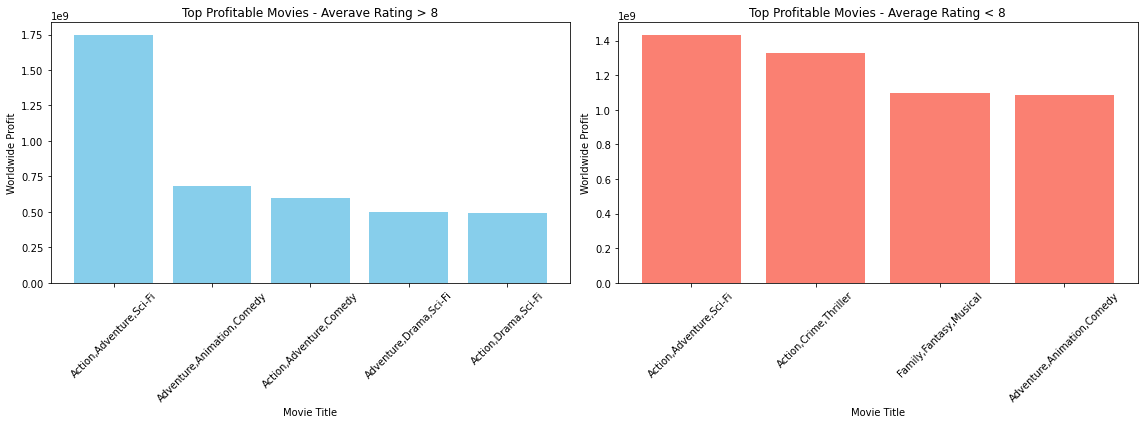

In [441]:
# Data for the first bar chart (top_profit_movies from critically acclaimed)
critically_acclaimed_graph = critically_aclaimed.nlargest(6, 'world_wide_profit')

# Data for the second bar chart (top_profit_movies from most profitable)
most_profitable_graph = most_profitable.nlargest(6, 'world_wide_profit')

# Create subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for the first subplot
ax1.bar(critically_acclaimed_graph['genres'], critically_acclaimed_graph['world_wide_profit'], color='skyblue')
ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Worldwide Profit')
ax1.set_title('Top Profitable Movies - Averave Rating > 8')
ax1.tick_params(axis='x', rotation=45)

# Plot for the second subplot
ax2.bar(most_profitable_graph['genres'], most_profitable_graph['world_wide_profit'], color='salmon')
ax2.set_xlabel('Movie Title')
ax2.set_ylabel('Worldwide Profit')
ax2.set_title('Top Profitable Movies - Average Rating < 8')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

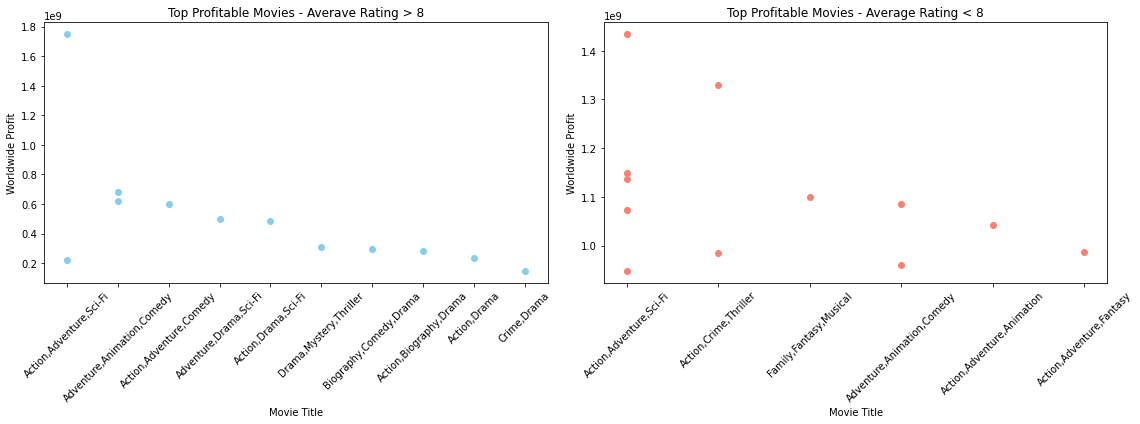

In [443]:
# Data for the first bar chart (top_profit_movies from critically acclaimed)
critically_acclaimed_graph = critically_aclaimed.nlargest(12, 'world_wide_profit')

# Data for the second bar chart (top_profit_movies from most profitable)
most_profitable_graph = most_profitable.nlargest(12, 'world_wide_profit')

# Create subplots with a shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for the first subplot
ax1.scatter(critically_acclaimed_graph['genres'], critically_acclaimed_graph['world_wide_profit'], color='skyblue')
ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Worldwide Profit')
ax1.set_title('Top Profitable Movies - Averave Rating > 8')
ax1.tick_params(axis='x', rotation=45)

# Plot for the second subplot
ax2.scatter(most_profitable_graph['genres'], most_profitable_graph['world_wide_profit'], color='salmon')
ax2.set_xlabel('Movie Title')
ax2.set_ylabel('Worldwide Profit')
ax2.set_title('Top Profitable Movies - Average Rating < 8')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
# The cluster in the lower left corner of the scatter plot, where movies have low worldwide gross profit relative to their production budget, suggests a weak correlation between production budget and profit. 
# This means that in this specific dataset, there is a tendency for some movies to have high budgets but not necessarily translate that investment into high profits.

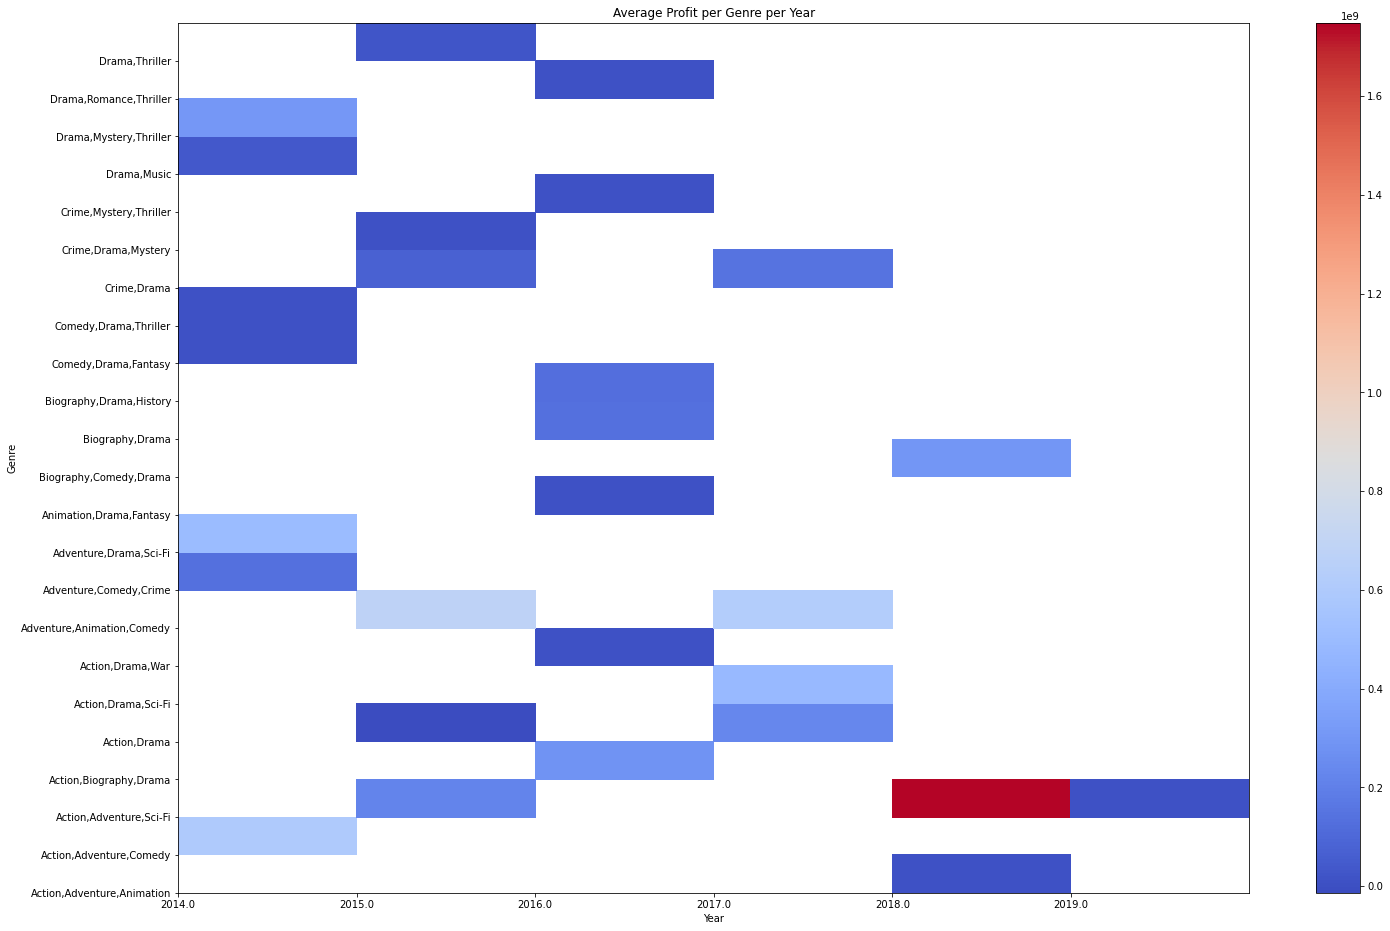

In [424]:
# Heatmap of Average Profit per Genre per Year
heatmap_data = critically_aclaimed.pivot_table(index='genres', columns='start_year', values='world_wide_profit', aggfunc='mean')
plt.figure(figsize=(24,16))
plt.pcolor(heatmap_data,cmap='coolwarm')
plt.colorbar()
plt.xlabel('Year')
plt.ylabel('Genre')
plt.title('Average Profit per Genre per Year')
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns)
plt.show()